**Objective:**
The objective is to classify individuals obesity levels taking into account eating habits and physical condition, to better understand the factors contributing to obesity.

**Importing Libraries and Dataset**

In [35]:
import numpy as np
import pandas as pd

In [36]:
from google.colab import files
uploaded = files.upload()

Saving ObesityDataSet.csv to ObesityDataSet (1).csv


In [37]:
df=pd.read_csv("ObesityDataSet.csv")

In [38]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**Data Pre-Processing**

In [39]:
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
       'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity']

In [40]:
df

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [41]:
df.isnull().sum()

Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
Family History with Overweight               0
Frequent consumption of high caloric food    0
Frequency of consumption of vegetables       0
Number of main meals                         0
Consumption of food between meals            0
Smoke                                        0
Consumption of water daily                   0
Calories consumption monitoring              0
Physical activity frequency                  0
Time using technology devices                0
Consumption of alcohol                       0
Transportation used                          0
Obesity                                      0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     2111 non-null   object 
 1   Age                                        2111 non-null   float64
 2   Height                                     2111 non-null   float64
 3   Weight                                     2111 non-null   float64
 4   Family History with Overweight             2111 non-null   object 
 5   Frequent consumption of high caloric food  2111 non-null   object 
 6   Frequency of consumption of vegetables     2111 non-null   float64
 7   Number of main meals                       2111 non-null   float64
 8   Consumption of food between meals          2111 non-null   object 
 9   Smoke                                      2111 non-null   object 
 10  Consumption of water dai

In [43]:
for i in df.select_dtypes(exclude = ['object']).columns:
    if i == 'Height':
        df[i] = df[i].round(2)
    elif  i =='Weight':
        df[i] = df[i].round(1)
    else:
        df[i] = df[i].round(0)

In [44]:
df.head(10)

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [45]:
df['Height'] = df['Height']*100
df['Obesity'] = df['Obesity'].apply(lambda x: x.replace('_', ' '))
df['Transportation used'] = df['Transportation used'].apply(lambda x: x.replace('_', ' '))

In [46]:
df.tail(10)

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
2101,Female,26.0,163.0,107.2,yes,yes,3.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public Transportation,Obesity Type III
2102,Female,26.0,163.0,108.1,yes,yes,3.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public Transportation,Obesity Type III
2103,Female,21.0,172.0,133.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Sometimes,Public Transportation,Obesity Type III
2104,Female,22.0,173.0,133.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Sometimes,Public Transportation,Obesity Type III
2105,Female,21.0,173.0,131.3,yes,yes,3.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Sometimes,Public Transportation,Obesity Type III
2106,Female,21.0,171.0,131.4,yes,yes,3.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Sometimes,Public Transportation,Obesity Type III
2107,Female,22.0,175.0,133.7,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public Transportation,Obesity Type III
2108,Female,23.0,175.0,133.7,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.0,174.0,133.3,yes,yes,3.0,3.0,Sometimes,no,3.0,no,1.0,1.0,Sometimes,Public Transportation,Obesity Type III
2110,Female,24.0,174.0,133.5,yes,yes,3.0,3.0,Sometimes,no,3.0,no,1.0,1.0,Sometimes,Public Transportation,Obesity Type III


In [47]:
df.dtypes

Gender                                        object
Age                                          float64
Height                                       float64
Weight                                       float64
Family History with Overweight                object
Frequent consumption of high caloric food     object
Frequency of consumption of vegetables       float64
Number of main meals                         float64
Consumption of food between meals             object
Smoke                                         object
Consumption of water daily                   float64
Calories consumption monitoring               object
Physical activity frequency                  float64
Time using technology devices                float64
Consumption of alcohol                        object
Transportation used                           object
Obesity                                       object
dtype: object

In [48]:
df['Age'] = df['Age'].astype('int64')
df['Frequency of consumption of vegetables'] = df['Frequency of consumption of vegetables'].astype('int64')
df['Number of main meals'] = df['Number of main meals'].astype('int64')
df['Consumption of water daily'] = df['Consumption of water daily'].astype('int64')
df['Physical activity frequency'] = df['Physical activity frequency'].astype('int64')
df['Time using technology devices'] = df['Time using technology devices'].astype('int64')

In [49]:
for column in df.columns:
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f"Unique values of column '{column}': {unique_values}")

Unique values of column 'Gender': ['Female' 'Male']
Unique values of column 'Family History with Overweight': ['yes' 'no']
Unique values of column 'Frequent consumption of high caloric food': ['no' 'yes']
Unique values of column 'Consumption of food between meals': ['Sometimes' 'Frequently' 'Always' 'no']
Unique values of column 'Smoke': ['no' 'yes']
Unique values of column 'Calories consumption monitoring': ['no' 'yes']
Unique values of column 'Consumption of alcohol': ['no' 'Sometimes' 'Frequently' 'Always']
Unique values of column 'Transportation used': ['Public Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Unique values of column 'Obesity': ['Normal Weight' 'Overweight Level I' 'Overweight Level II'
 'Obesity Type I' 'Insufficient Weight' 'Obesity Type II'
 'Obesity Type III']


**EDA**

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

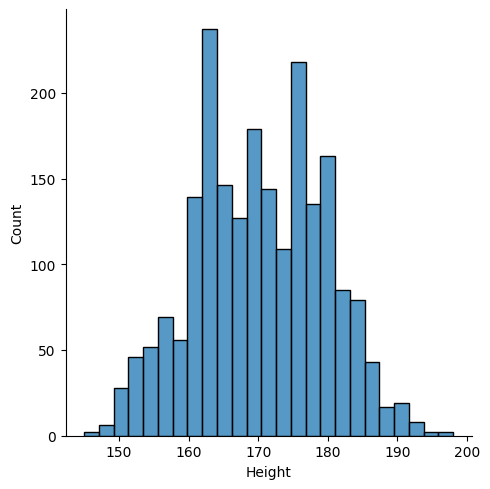

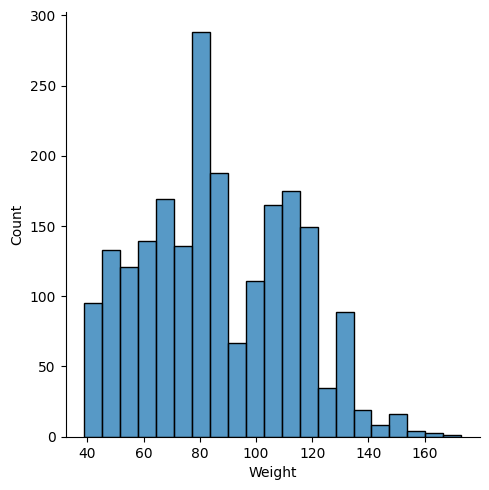

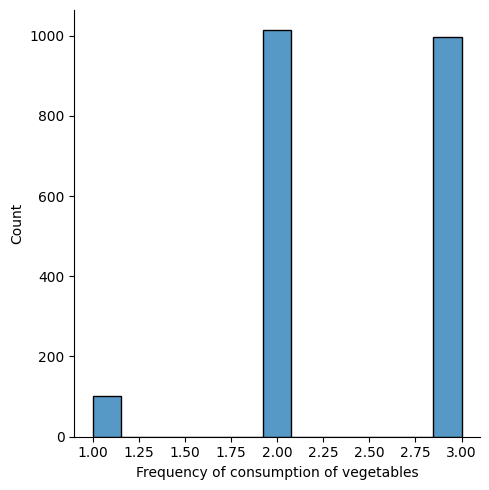

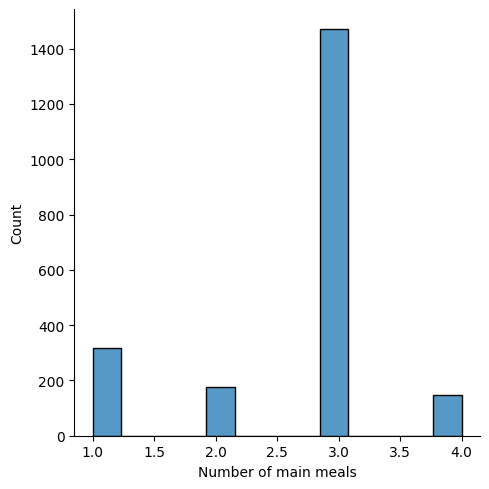

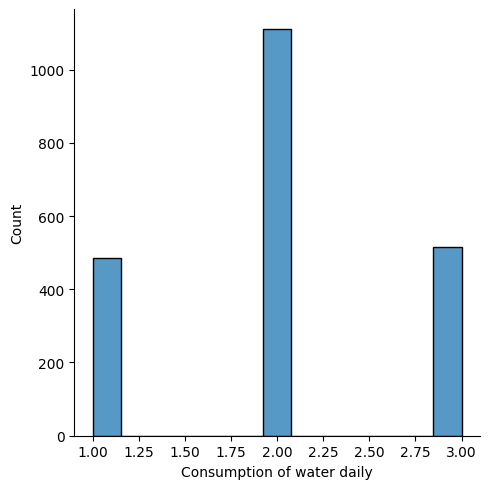

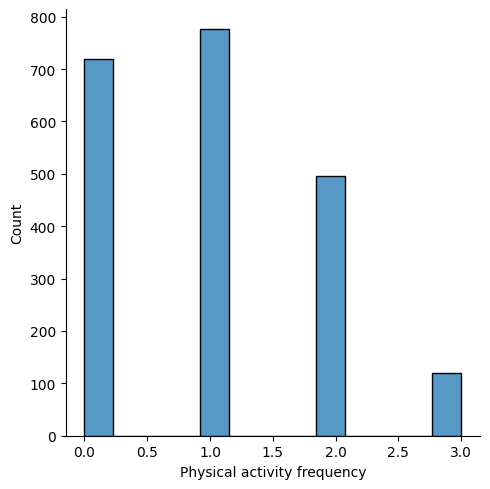

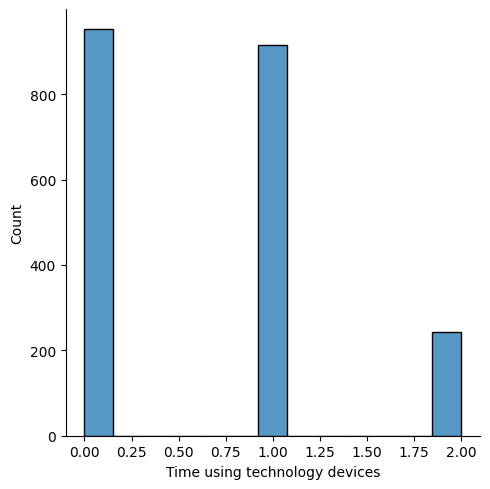

In [51]:
def distplots(col):
    sns.displot(df[col])
    plt.show()

for i in list(df.select_dtypes(exclude='object').columns)[1:]:
    distplots(i)

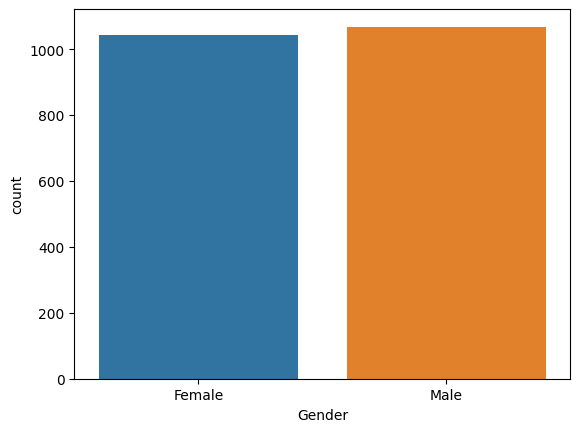

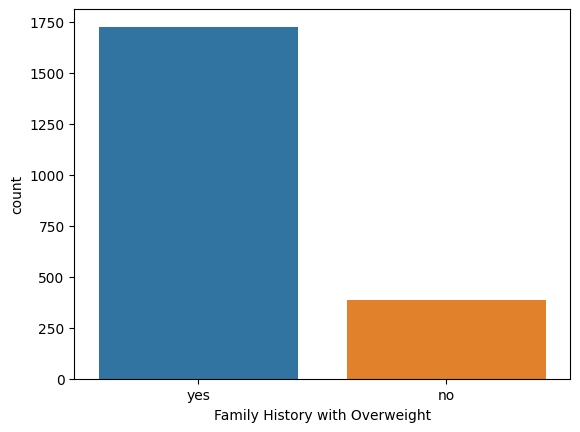

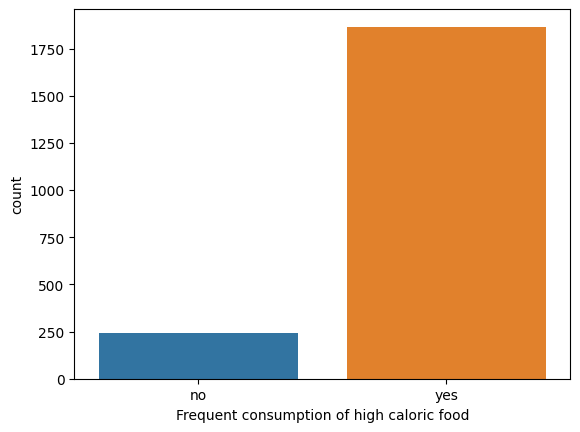

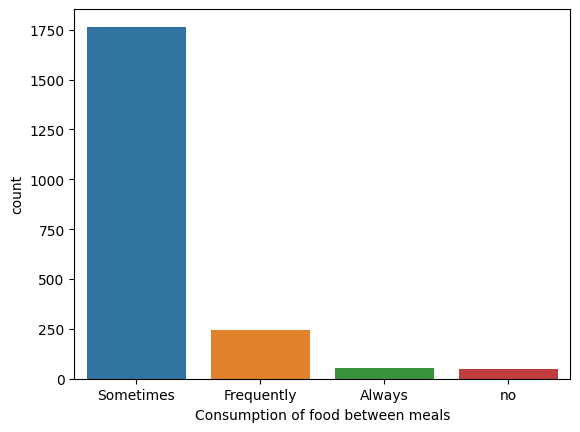

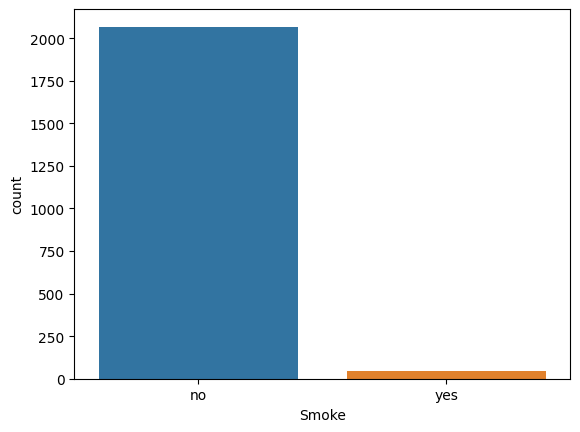

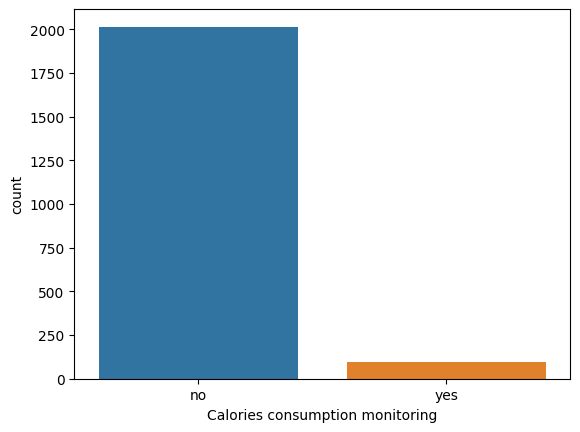

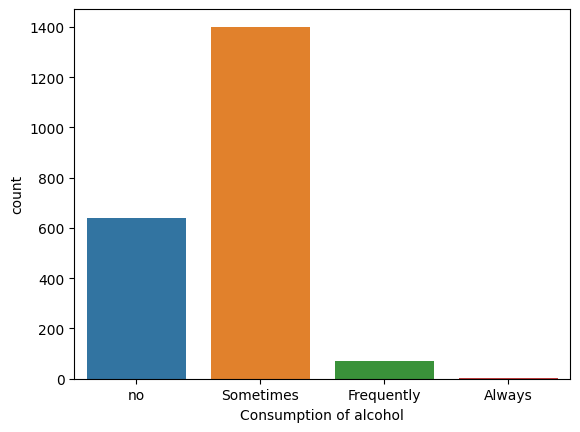

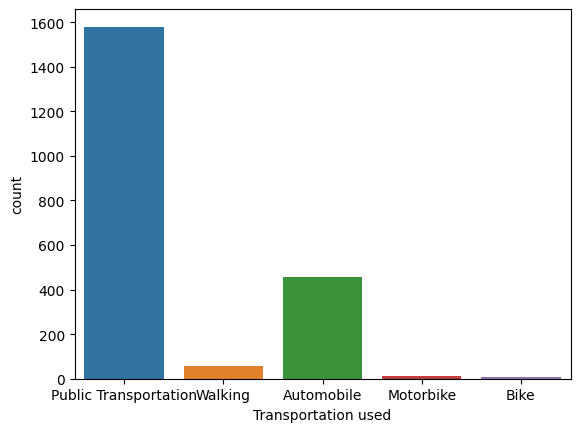

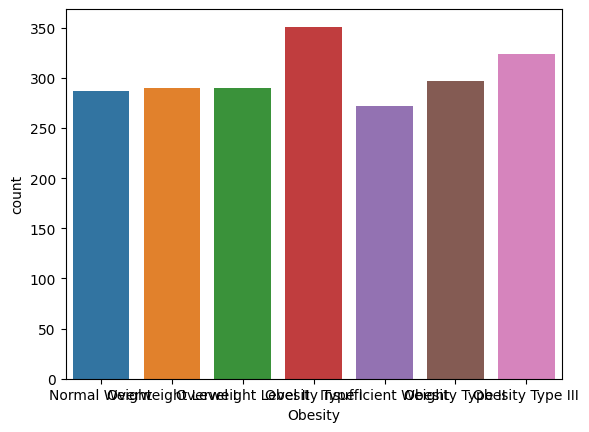

In [52]:
def countplots(col):
    sns.countplot(data=df, x=col)
    plt.show()

for col in df.select_dtypes(include='object').columns:
    countplots(col)

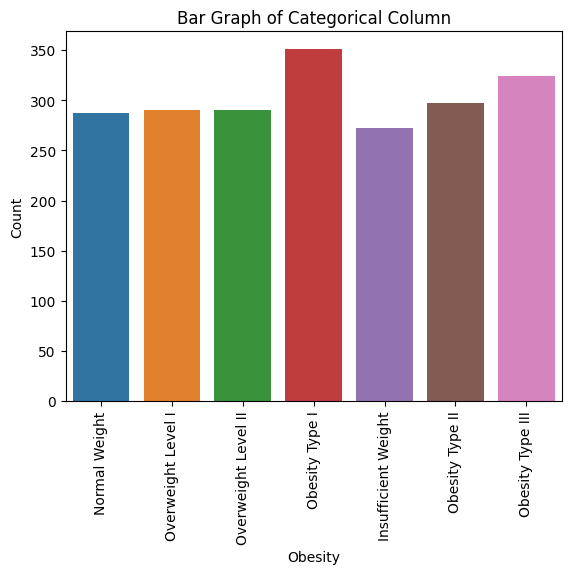

In [53]:
sns.countplot(x='Obesity', data=df)

# Set labels and title
plt.xlabel('Obesity')
plt.ylabel('Count')
plt.title('Bar Graph of Categorical Column')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

**Encoding Categorical Values**

In [54]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Family History with Overweight'] = encoder.fit_transform(df['Family History with Overweight'])
df['Frequent consumption of high caloric food'] = encoder.fit_transform(df['Frequent consumption of high caloric food'])
df['Consumption of food between meals'] = encoder.fit_transform(df['Consumption of food between meals'])
df['Smoke'] = encoder.fit_transform(df['Smoke'])
df['Calories consumption monitoring'] = encoder.fit_transform(df['Calories consumption monitoring'])
df['Consumption of alcohol'] = encoder.fit_transform(df['Consumption of alcohol'])
df['Transportation used'] = encoder.fit_transform(df['Transportation used'])
df['Obesity'] = encoder.fit_transform(df['Obesity'])

**Prediction**

In [55]:
X = df.drop('Obesity', axis =1)
Y = df['Obesity']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [57]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [58]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [60]:
print("Accuracy from RandomForest Classification Model :",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision from RandomForest Classification Model :",metrics.precision_score(y_test,y_pred_rf,  average='macro'))
print("Recall from RandomForest Classification Model :",metrics.recall_score(y_test,y_pred_rf,  average='macro'))
print("f1_score from RandomForest Classification Model :",metrics.f1_score(y_test,y_pred_rf,  average='macro'))


Accuracy from RandomForest Classification Model : 0.9384858044164038
Precision from RandomForest Classification Model : 0.9386743922513026
Recall from RandomForest Classification Model : 0.93779374103484
f1_score from RandomForest Classification Model : 0.9380030713588933


In [61]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
print("Accuracy from Decison tree Model :",metrics.accuracy_score (y_test, y_pred_dt))
print("Precision from Decison tree Model :",metrics.precision_score(y_test,y_pred_dt,  average='macro'))
print("Recall from Decison tree Model :",metrics.recall_score(y_test,y_pred_dt,  average='macro'))
print("f1_score from Decison tree Model :",metrics.f1_score(y_test,y_pred_dt,  average='macro'))

Accuracy from Decison tree Model : 0.9242902208201893
Precision from Decison tree Model : 0.9227901487082084
Recall from Decison tree Model : 0.9242712092719421
f1_score from Decison tree Model : 0.9234145415544823


In [62]:
from sklearn.preprocessing import MinMaxScaler
# Assuming X contains your dataset
scaler = MinMaxScaler()  # Create an instance of MinMaxScaler
X_train_mm_scaled = scaler.fit_transform(X_train)
X_test_mm_scaled = scaler.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
kn= KNeighborsClassifier()
kn.fit(X_train_mm_scaled, y_train)
y_pred_kn = kn.predict(X_test_mm_scaled)
print("Accuracy from KNN Classification Model :",metrics.accuracy_score (y_test, y_pred_kn))
print("Precision from KNN Model :",metrics.precision_score(y_test,y_pred_kn,  average='macro'))
print("Recall from  KNN  Model :",metrics.recall_score(y_test,y_pred_kn,  average='macro'))
print("f1_score from KNN Model :",metrics.f1_score(y_test,y_pred_kn,  average='macro'))

Accuracy from KNN Classification Model : 0.722397476340694
Precision from KNN Model : 0.7146113747060238
Recall from  KNN  Model : 0.7171041181717263
f1_score from KNN Model : 0.7055078905520806


In [63]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_n = naive_bayes.predict(X_test)
print("Accuracy from Naive Model :",metrics.accuracy_score (y_test, y_pred_n))
print("Precision from Naive Model :",metrics.precision_score(y_test,y_pred_n,  average='macro'))
print("Recall from Naive Model :",metrics.recall_score(y_test,y_pred_n,  average='macro'))
print("f1_score from Naive Model :",metrics.f1_score(y_test,y_pred_n,  average='macro'))


Accuracy from Naive Model : 0.6056782334384858
Precision from Naive Model : 0.6028010820292715
Recall from Naive Model : 0.5960081364058346
f1_score from Naive Model : 0.5760663169715069


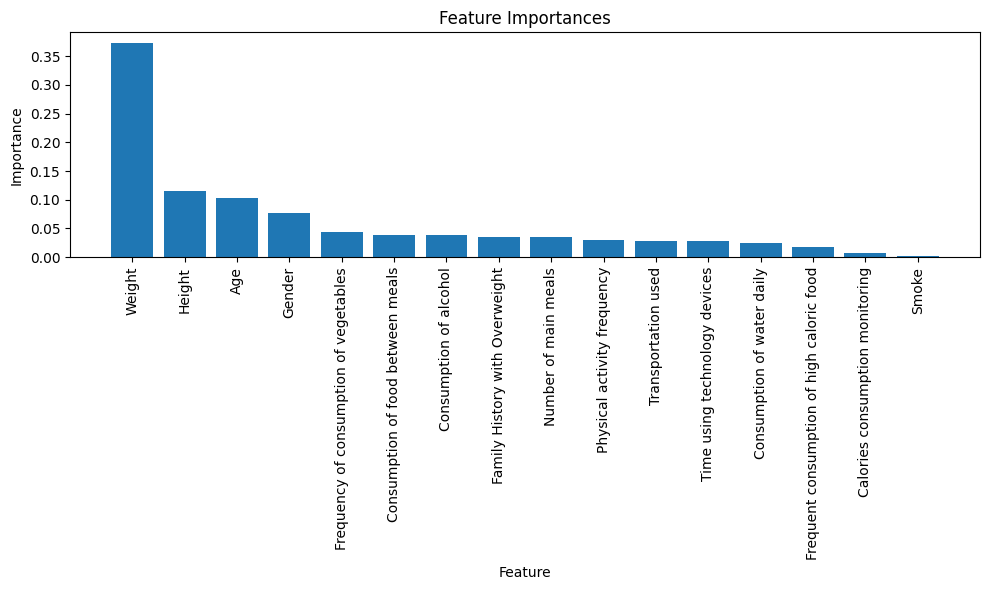

In [64]:
importances = rf.feature_importances_

# Get the corresponding feature names
feature_names = np.array(X.columns)

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], tick_label=feature_names[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()